<a href="https://colab.research.google.com/github/vanryuji/data_analysis/blob/master/qanda_review/qanda_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

In [0]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# Download font

In [3]:
!rm -rf NanumBarunGothic
!git clone https://github.com/moonspam/NanumBarunGothic.git
font_path = 'NanumBarunGothic/NanumBarunGothicSubset.ttf'
!ls -l NanumBarunGothic

Cloning into 'NanumBarunGothic'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.
total 12892
-rw-r--r-- 1 root root    1728 Jun 10 09:13 index.html
-rw-r--r-- 1 root root  560077 Jun 10 09:13 NanumBarunGothicBoldSubset.eot
-rw-r--r-- 1 root root 1513348 Jun 10 09:13 NanumBarunGothicBoldSubset.ttf
-rw-r--r-- 1 root root  590444 Jun 10 09:13 NanumBarunGothicBoldSubset.woff
-rw-r--r-- 1 root root  418324 Jun 10 09:13 NanumBarunGothicBoldSubset.woff2
-rw-r--r-- 1 root root  683701 Jun 10 09:13 NanumBarunGothicLightSubset.eot
-rw-r--r-- 1 root root 1849732 Jun 10 09:13 NanumBarunGothicLightSubset.ttf
-rw-r--r-- 1 root root  711312 Jun 10 09:13 NanumBarunGothicLightSubset.woff
-rw-r--r-- 1 root root  525464 Jun 10 09:13 NanumBarunGothicLightSubset.woff2
-rw-r--r-- 1 root root    1252 Jun 10 09:13 nanumbarungothicsubset.css
-rw-r--r-- 1 root root  478838 Jun 10 09:13 NanumBarunGothicSubset.eot
-rw-r

# Download Quanda review

In [4]:
!rm -rf Medium_material
!git clone https://github.com/mathpresso/Medium_material.git
review_data = 'Medium_material/qanda_review/sample_201803.csv'
!ls -l

Cloning into 'Medium_material'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.
total 12
drwxr-xr-x 4 root root 4096 Jun 10 09:13 Medium_material
drwxr-xr-x 3 root root 4096 Jun 10 09:13 NanumBarunGothic
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


# Load Quanda review

In [5]:
origin = pd.read_csv(review_data)
origin.head()

,Review Text,Review Title,Review Submit Date and Time
0,NaN,NaN,2018-03-01T00:40:11Z
1,진짜좋군뇨,NaN,2018-03-01T00:40:27Z
2,모르는 문제 있으면 바로바로 앱으로 알수있어서 완전좋습니다조아요 풀이도 이해가기쉽게...,NaN,2018-03-01T00:52:07Z
3,진짜 좋은것 같아요!,NaN,2018-03-01T00:56:43Z
4,조..조아여,NaN,2018-03-01T01:03:40Z


In [0]:
def change_to_datetime(submit_string):
    year = submit_string.split('-')[0]
    month = submit_string.split('-')[1]
    day = submit_string.split('-')[2].split('T')[0]
    
    return datetime.datetime(int(year), int(month), int(day))

In [7]:
origin['Date_Time'] = origin['Review Submit Date and Time'].apply(lambda info_str: change_to_datetime(info_str))
origin = origin[['Review Text', 'Review Title', 'Date_Time']]
origin.index = range(len(origin))
origin.head()

,Review Text,Review Title,Date_Time
0,NaN,NaN,2018-03-01
1,진짜좋군뇨,NaN,2018-03-01
2,모르는 문제 있으면 바로바로 앱으로 알수있어서 완전좋습니다조아요 풀이도 이해가기쉽게...,NaN,2018-03-01
3,진짜 좋은것 같아요!,NaN,2018-03-01
4,조..조아여,NaN,2018-03-01


# Word Cloud

In [8]:
# query

start_date = '2018-03-10'
end_date = '2018-03-31'
query = origin[(origin.Date_Time >= start_date) & (origin.Date_Time <= end_date)]
query.head(10)

,Review Text,Review Title,Date_Time
1173,꼭한번 써보시길!! 진짜 짱좋은거같음!!,NaN,2018-03-10
1174,편했구 바로바로 풀이를 볼수있어 좋았지만 질문권을 얻기가 좀힘든거 같아요,NaN,2018-03-10
1175,정말로 좋은 앱인것 같아서 좋아요,NaN,2018-03-10
1176,너무너무 좋고 이 앱 덕분에 시간절약두 많이 했어요!!감사합니다~~,NaN,2018-03-10
1177,너무나도 좋고 친절해서 더 좋아요,NaN,2018-03-10
1178,"다음에는 사회,국어,과학같은 다양한과제풀이가나왔음좋겠어요~^^",NaN,2018-03-10
1180,앱 너무좋아요! 원하는 문제랑 똑같은 문제답이 나와요♥애용중~,NaN,2018-03-10
1181,수학공부하기 최고...^^b,NaN,2018-03-10
1182,NaN,NaN,2018-03-10
1183,어려운 문제 풀기에 넘넘 조아용♥,NaN,2018-03-10


In [9]:
# remove NaN data

q = query[['Review Text', 'Date_Time']].dropna()
q.columns = ['Reviews', 'Date_Time']
q.head(10)

,Reviews,Date_Time
1173,꼭한번 써보시길!! 진짜 짱좋은거같음!!,2018-03-10
1174,편했구 바로바로 풀이를 볼수있어 좋았지만 질문권을 얻기가 좀힘든거 같아요,2018-03-10
1175,정말로 좋은 앱인것 같아서 좋아요,2018-03-10
1176,너무너무 좋고 이 앱 덕분에 시간절약두 많이 했어요!!감사합니다~~,2018-03-10
1177,너무나도 좋고 친절해서 더 좋아요,2018-03-10
1178,"다음에는 사회,국어,과학같은 다양한과제풀이가나왔음좋겠어요~^^",2018-03-10
1180,앱 너무좋아요! 원하는 문제랑 똑같은 문제답이 나와요♥애용중~,2018-03-10
1181,수학공부하기 최고...^^b,2018-03-10
1183,어려운 문제 풀기에 넘넘 조아용♥,2018-03-10
1184,제가 쓰던 앱중에 제일 최고네요!!,2018-03-10


In [10]:
# 의미있는 단어 카운트

q.index = range(len(q))  # reindex

parser = Okt()
q['preprocess'] = q.Reviews.apply(lambda text : " ".join(parser.morphs(text)))
cnt = Counter(word for line in q.preprocess for word in line.split())
print(cnt)

Counter({'이': 878, '문제': 667, '좋아요': 520, '!': 471, '앱': 468, '너무': 464, '가': 429, '진짜': 332, '도': 329, '정말': 305, '을': 288, '.': 266, '수학': 263, '!!': 254, '를': 252, '풀이': 247, '좋은': 242, '에': 241, '모르는': 217, '잘': 202, '같아요': 193, '것': 188, '들': 183, '질문': 181, '때': 176, '거': 163, '선생님': 158, '빨리': 151, '..': 138, '짱': 128, '안': 127, '수': 122, '공부': 121, '요': 117, '콴다': 115, '다': 112, '로': 109, '...': 109, '할': 109, '제': 108, '이해': 108, '와': 106, '감사합니다': 105, '만': 96, '완전': 96, '은': 95, '는': 93, '도움': 92, '더': 89, '많이': 88, '좋네요': 88, '답': 87, '있어서': 87, '최고': 86, 'ㅠㅠ': 81, '입니다': 76, '이런': 75, '어플': 74, '이에요': 73, '의': 73, '?': 73, '권': 70, '쉽게': 70, '!!!': 69, ',': 67, '바로': 67, '못': 63, '으로': 62, '학원': 62, '사용': 61, '~': 60, '좋음': 60, '하고': 59, '나와서': 59, '혼자': 58, '추천': 58, '덕분': 57, '사진': 55, '넘': 54, '저': 54, '고': 54, '좋습니다': 54, '게': 53, '인': 51, '바로바로': 50, '숙제': 50, '^^': 50, '알': 50, 'ㅠ': 49, '검색': 48, '대박': 47, '♡': 47, '좀': 46, '한': 46, '해서': 45, '에서': 44, '문': 43, '해결':

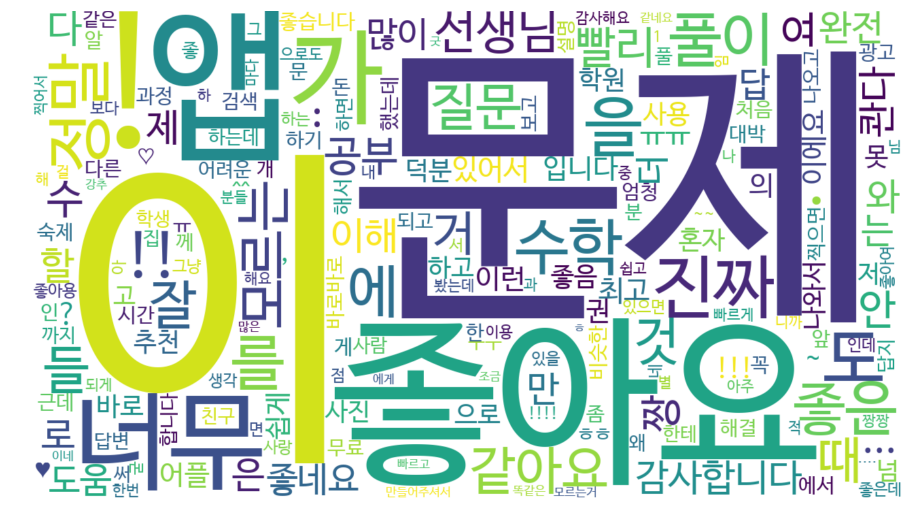

In [11]:
# draw Word Cloud

wc = WordCloud(font_path=font_path, width=1280 , height=720, background_color="white").generate_from_frequencies(cnt)

plt.figure(figsize=(16,9))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()